In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

##Read in predicted Variable
preds=pd.read_csv('data_bio_sumed_pred.csv')


In [12]:
##Convert category into float
def predict(x):
    if x=='Rev':
        return 0
    elif x=='Aff':
        return 1
    else:
        return None

def original(x):
    if x==2:
        return 0
    elif x==1:
        return 1
    else:
        return None
preds['Prediction']=preds.pred.apply(predict)
preds['Real']=preds.res.apply(original)


##Add intercept
preds['Intercept']=1


In [13]:
preds

,Unnamed: 0,index,year,caseid,opinion_type,judge_name,decision,date,Author,Affirmed,...,x_sdem_dm,x_srep_dm,x_hother_dm,x_sother_dm,x_agecommi_dm,pred,res,Prediction,Intercept,Real
0,0,2304,1993,X35807,contentMajOp,PER CURIAM,affirmed,744422400000,NaN,1,...,-7.459459,2.614865,0.810811,0.986486,6.472973,Aff,1.0,1.0,1,1.0
1,1,2796,1992,X3AD9D,contentMajOp,LOGAN,affirmed,721612800000,LOGAN,1,...,10.259259,-10.259259,-0.074074,0.000000,-4.314815,Rev,1.0,0.0,1,1.0
2,2,2805,1992,X3ADTB,contentMajOp,LOGAN,reversed,725587200000,LOGAN,0,...,10.259259,-10.259259,-0.074074,0.000000,-4.314815,Rev,2.0,0.0,1,0.0
3,3,2814,1997,X37GPR,contentMajOp,JOHN C,affirmed,855619200000,PORFILIO,1,...,10.901408,-10.901408,-0.281690,0.000000,-4.112676,Rev,1.0,0.0,1,1.0
4,4,2816,1999,X4QAM7,contentMajOp,HOLLOWAY,affirmed,915408000000,HOLLOWAY,1,...,10.536232,-10.536232,-0.304348,0.000000,-4.478261,Aff,1.0,1.0,1,1.0
5,5,2817,1998,XN5ACRQNB5G0,contentMajOp,JOHN C,affirmed,888192000000,PORFILIO,1,...,11.857143,-11.857143,-0.300000,0.000000,-4.057143,Rev,1.0,0.0,1,1.0
6,6,2819,1991,X57EQB,contentMajOp,JOHN P,reversed,692928000000,MOORE,0,...,7.933333,-7.933333,0.000000,0.000000,-4.666667,Aff,2.0,1.0,1,0.0
7,7,2820,1991,XAC38F,contentMajOp,BRORBY,affirmed,694137600000,BRORBY,1,...,7.933333,-7.933333,0.000000,0.000000,-4.666667,Aff,1.0,1.0,1,1.0
8,8,2821,1995,X4NT3Q,contentMajOp,HOLLOWAY,affirmed,813974400000,HOLLOWAY,1,...,8.181818,-8.181818,-0.090909,0.000000,-4.757576,Aff,1.0,1.0,1,1.0
9,9,2822,2000,X3FBF1,contentMajOp,TACHA,affirmed,954806400000,TACHA,1,...,10.795455,-10.795455,-0.477273,0.000000,-3.454545,Aff,1.0,1.0,1,1.0


In [14]:

##Prediction statistic describtion

print('Prediction')
print(preds.dropna(subset = ['Prediction']).groupby('pred').length_3m_dif.describe())

##Real Target statistic describtion
## 1 means affirmed, 0 meansa reversed
print('Real Target')
print(preds.dropna(subset = ['Prediction']).groupby('Real').length_3m_dif.describe())


Prediction
       count      mean       std        min       25%       50%       75%  \
pred                                                                        
Aff   4368.0  0.210948  1.763347 -11.975676 -0.954276  0.167282  1.120571   
Rev   3020.0  0.260262  1.945676 -31.117376 -0.928986  0.236189  1.180749   

           max  
pred            
Aff   7.447860  
Rev   7.455268  
Real Target
       count      mean       std        min       25%       50%       75%  \
Real                                                                        
0.0   1300.0  0.257345  2.216179 -31.117376 -0.910801  0.201550  1.236077   
1.0   6088.0  0.225503  1.749505 -11.975676 -0.951610  0.199409  1.130105   

           max  
Real            
0.0   7.447860  
1.0   7.455268  


In [18]:

##If categorize, use here
def cat(v):
    if v>(-0.5) and v<0.5:
        return 'NoChange'
    elif v>=0.5:
        return 'Increase'
    else:
        return 'Decrease'

preds['CatLength']=preds.length_3m_dif.apply(cat)

print(preds.dropna(subset = ['Prediction']).groupby('Prediction').CatLength.value_counts())
print(preds.dropna(subset = ['Prediction']).groupby('Real').CatLength.value_counts())

Prediction  CatLength
0.0         Increase     1295
            Decrease     1022
            NoChange      703
1.0         Increase     1777
            Decrease     1493
            NoChange     1098
Name: CatLength, dtype: int64
Real  CatLength
0.0   Increase      558
      Decrease      439
      NoChange      303
1.0   Increase     2514
      Decrease     2076
      NoChange     1498
Name: CatLength, dtype: int64


In [26]:
##Fit Linear regression and get coefficients
regr1 = linear_model.LinearRegression()
regr1.fit(preds.dropna(subset = ['Prediction'])[['Real','Intercept']],preds.dropna(subset = ['Prediction']).length_3m_dif)
print('Real Binary OLS Coefficient:',regr1.coef_[0])
regr2 = linear_model.LinearRegression()
regr2.fit(preds.dropna(subset = ['Prediction'])[['Prediction','Intercept']],preds.dropna(subset = ['Prediction']).length_3m_dif)
print('Prediction Binary OLS Coefficient:',regr2.coef_[0])


Real Binary OLS Coefficient: -0.0318423515354
Prediction Binary OLS Coefficient: -0.04931422005


In [39]:
from sklearn.metrics import mean_squared_error
print('MSE of Binary second Stage: ',mean_squared_error(preds.dropna(subset = ['Prediction'])['Real'],regr2.predict(preds.dropna(subset = ['Prediction'])[['Prediction','Intercept']])))

MSE of Binary second Stage:  0.502624027966


In [29]:
import seaborn as sns
sns.set_style('darkgrid')

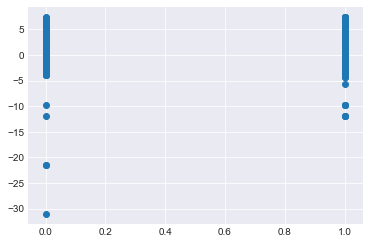

In [33]:
plt.scatter(preds.dropna(subset = ['Prediction'])['Real'],preds.dropna(subset = ['Prediction']).length_3m_dif)
plt.show()

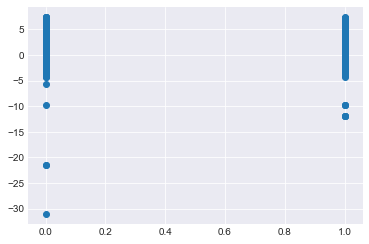

In [34]:
plt.scatter(preds.dropna(subset = ['Prediction'])['Prediction'],preds.dropna(subset = ['Prediction']).length_3m_dif)
plt.show()

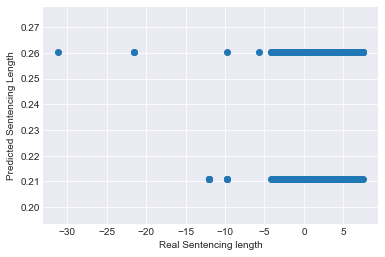

In [32]:
plt.scatter(preds.dropna(subset = ['Prediction']).length_3m_dif, regr2.predict(preds.dropna(subset = ['Prediction'])[['Prediction','Intercept']]))
plt.xlabel('Real Sentencing length')
plt.ylabel('Predicted Sentencing Length')
plt.show()